# Train & Analysis of Linear model

In [34]:
# Make sure you use the autograd version of numpy (which we named 'ag_np')
# to do all the loss calculations, since automatic gradients are needed
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem

In [47]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterOneScalarPerItem(
    n_epochs=3000, batch_size=10000, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.63800 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     7.03040 | grad_wrt_b_per_user     0.00746 | grad_wrt_c_per_item     0.00418
epoch       0.143 | loss_total     9.31544 | train_MAE     2.82493 | valid_MAE     2.83941 | grad_wrt_mu     5.67669 | grad_wrt_b_per_user     0.00602 | grad_wrt_c_per_item     0.00337
epoch       0.286 | loss_total     6.38398 | train_MAE     2.28881 | valid_MAE     2.30174 | grad_wrt_mu     4.52272 | grad_wrt_b_per_user     0.00480 | grad_wrt_c_per_item     0.00269
epoch       0.429 | loss_total     4.47692 | train_MAE     1.89048 | valid_MAE     1.90087 | grad_wrt_mu     3.56305 | grad_wrt_b_per_user     0.00379 | grad_wrt_c_per_item     0.00213
epoch       0.571 | loss_total     3.32746 | train_MAE     1.59617 | valid_MAE     1.60475 | grad_wrt_mu     2.87334 | grad_wrt_b_per_user     0.00307 | grad_wrt_c_per_item     0.00174
epoch       0.714 | loss_total     2.58673 | train_MAE     1.40839 | valid_

epoch      31.000 | loss_total     1.19707 | train_MAE     0.91823 | valid_MAE     0.92061 | grad_wrt_mu     0.06497 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00055
epoch      32.000 | loss_total     1.20009 | train_MAE     0.91790 | valid_MAE     0.92038 | grad_wrt_mu     0.02703 | grad_wrt_b_per_user     0.00082 | grad_wrt_c_per_item     0.00052
epoch      34.000 | loss_total     1.19247 | train_MAE     0.91616 | valid_MAE     0.91875 | grad_wrt_mu     0.02825 | grad_wrt_b_per_user     0.00079 | grad_wrt_c_per_item     0.00053
epoch      36.000 | loss_total     1.18557 | train_MAE     0.91417 | valid_MAE     0.91684 | grad_wrt_mu     0.00822 | grad_wrt_b_per_user     0.00080 | grad_wrt_c_per_item     0.00050
epoch      38.000 | loss_total     1.18289 | train_MAE     0.91271 | valid_MAE     0.91551 | grad_wrt_mu     0.00433 | grad_wrt_b_per_user     0.00080 | grad_wrt_c_per_item     0.00053
epoch      40.000 | loss_total     1.18151 | train_MAE     0.91143 | valid_

epoch     120.000 | loss_total     1.08297 | train_MAE     0.86292 | valid_MAE     0.86980 | grad_wrt_mu     0.00687 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00045
epoch     122.000 | loss_total     1.07958 | train_MAE     0.86182 | valid_MAE     0.86875 | grad_wrt_mu     0.02761 | grad_wrt_b_per_user     0.00068 | grad_wrt_c_per_item     0.00046
epoch     124.000 | loss_total     1.07973 | train_MAE     0.86094 | valid_MAE     0.86796 | grad_wrt_mu     0.01076 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00044
epoch     126.000 | loss_total     1.07658 | train_MAE     0.85940 | valid_MAE     0.86644 | grad_wrt_mu     0.01049 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00047
epoch     128.000 | loss_total     1.07488 | train_MAE     0.85895 | valid_MAE     0.86611 | grad_wrt_mu     0.00296 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00046
epoch     132.000 | loss_total     1.07209 | train_MAE     0.85694 | valid_

epoch     300.000 | loss_total     0.98107 | train_MAE     0.80330 | valid_MAE     0.81448 | grad_wrt_mu     0.00379 | grad_wrt_b_per_user     0.00051 | grad_wrt_c_per_item     0.00035
epoch     304.000 | loss_total     0.97757 | train_MAE     0.80258 | valid_MAE     0.81384 | grad_wrt_mu     0.02041 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00036
epoch     308.000 | loss_total     0.97981 | train_MAE     0.80166 | valid_MAE     0.81297 | grad_wrt_mu     0.00561 | grad_wrt_b_per_user     0.00053 | grad_wrt_c_per_item     0.00038
epoch     312.000 | loss_total     0.97977 | train_MAE     0.80080 | valid_MAE     0.81216 | grad_wrt_mu     0.00814 | grad_wrt_b_per_user     0.00056 | grad_wrt_c_per_item     0.00038
epoch     316.000 | loss_total     0.98100 | train_MAE     0.80018 | valid_MAE     0.81162 | grad_wrt_mu     0.03271 | grad_wrt_b_per_user     0.00056 | grad_wrt_c_per_item     0.00038
epoch     320.000 | loss_total     0.97661 | train_MAE     0.79955 | valid_

epoch     480.000 | loss_total     0.93890 | train_MAE     0.77747 | valid_MAE     0.79138 | grad_wrt_mu     0.00357 | grad_wrt_b_per_user     0.00047 | grad_wrt_c_per_item     0.00033
epoch     484.000 | loss_total     0.93930 | train_MAE     0.77738 | valid_MAE     0.79140 | grad_wrt_mu     0.01249 | grad_wrt_b_per_user     0.00049 | grad_wrt_c_per_item     0.00034
epoch     488.000 | loss_total     0.93574 | train_MAE     0.77673 | valid_MAE     0.79076 | grad_wrt_mu     0.03018 | grad_wrt_b_per_user     0.00047 | grad_wrt_c_per_item     0.00034
epoch     492.000 | loss_total     0.93977 | train_MAE     0.77655 | valid_MAE     0.79066 | grad_wrt_mu     0.02808 | grad_wrt_b_per_user     0.00047 | grad_wrt_c_per_item     0.00033
epoch     496.000 | loss_total     0.93788 | train_MAE     0.77624 | valid_MAE     0.79041 | grad_wrt_mu     0.01189 | grad_wrt_b_per_user     0.00048 | grad_wrt_c_per_item     0.00033
epoch     500.000 | loss_total     0.93982 | train_MAE     0.77594 | valid_

epoch     808.000 | loss_total     0.90026 | train_MAE     0.75646 | valid_MAE     0.77384 | grad_wrt_mu     0.01209 | grad_wrt_b_per_user     0.00044 | grad_wrt_c_per_item     0.00031
epoch     816.000 | loss_total     0.90109 | train_MAE     0.75615 | valid_MAE     0.77361 | grad_wrt_mu     0.01133 | grad_wrt_b_per_user     0.00045 | grad_wrt_c_per_item     0.00031
epoch     824.000 | loss_total     0.89526 | train_MAE     0.75566 | valid_MAE     0.77315 | grad_wrt_mu     0.02912 | grad_wrt_b_per_user     0.00045 | grad_wrt_c_per_item     0.00030
epoch     832.000 | loss_total     0.90132 | train_MAE     0.75517 | valid_MAE     0.77267 | grad_wrt_mu     0.00322 | grad_wrt_b_per_user     0.00043 | grad_wrt_c_per_item     0.00030
epoch     840.000 | loss_total     0.89603 | train_MAE     0.75506 | valid_MAE     0.77270 | grad_wrt_mu     0.00448 | grad_wrt_b_per_user     0.00043 | grad_wrt_c_per_item     0.00029
epoch     848.000 | loss_total     0.89687 | train_MAE     0.75478 | valid_

epoch    1176.000 | loss_total     0.87524 | train_MAE     0.74497 | valid_MAE     0.76498 | grad_wrt_mu     0.00643 | grad_wrt_b_per_user     0.00041 | grad_wrt_c_per_item     0.00029
epoch    1184.000 | loss_total     0.87756 | train_MAE     0.74496 | valid_MAE     0.76505 | grad_wrt_mu     0.01699 | grad_wrt_b_per_user     0.00044 | grad_wrt_c_per_item     0.00028
epoch    1192.000 | loss_total     0.87885 | train_MAE     0.74484 | valid_MAE     0.76500 | grad_wrt_mu     0.00065 | grad_wrt_b_per_user     0.00044 | grad_wrt_c_per_item     0.00028
epoch    1200.000 | loss_total     0.87601 | train_MAE     0.74453 | valid_MAE     0.76470 | grad_wrt_mu     0.00543 | grad_wrt_b_per_user     0.00042 | grad_wrt_c_per_item     0.00027
epoch    1208.000 | loss_total     0.87385 | train_MAE     0.74450 | valid_MAE     0.76475 | grad_wrt_mu     0.02248 | grad_wrt_b_per_user     0.00042 | grad_wrt_c_per_item     0.00028
epoch    1216.000 | loss_total     0.87696 | train_MAE     0.74427 | valid_

epoch    1544.000 | loss_total     0.86159 | train_MAE     0.73851 | valid_MAE     0.76043 | grad_wrt_mu     0.01146 | grad_wrt_b_per_user     0.00041 | grad_wrt_c_per_item     0.00028
epoch    1552.000 | loss_total     0.86533 | train_MAE     0.73853 | valid_MAE     0.76051 | grad_wrt_mu     0.01681 | grad_wrt_b_per_user     0.00042 | grad_wrt_c_per_item     0.00028
epoch    1560.000 | loss_total     0.86830 | train_MAE     0.73849 | valid_MAE     0.76052 | grad_wrt_mu     0.02434 | grad_wrt_b_per_user     0.00042 | grad_wrt_c_per_item     0.00028
epoch    1568.000 | loss_total     0.86458 | train_MAE     0.73817 | valid_MAE     0.76019 | grad_wrt_mu     0.01182 | grad_wrt_b_per_user     0.00040 | grad_wrt_c_per_item     0.00029
epoch    1576.000 | loss_total     0.86374 | train_MAE     0.73812 | valid_MAE     0.76018 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00040 | grad_wrt_c_per_item     0.00026
epoch    1584.000 | loss_total     0.86425 | train_MAE     0.73800 | valid_

epoch    1912.000 | loss_total     0.85973 | train_MAE     0.73426 | valid_MAE     0.75761 | grad_wrt_mu     0.01289 | grad_wrt_b_per_user     0.00043 | grad_wrt_c_per_item     0.00027
epoch    1920.000 | loss_total     0.85865 | train_MAE     0.73422 | valid_MAE     0.75760 | grad_wrt_mu     0.02923 | grad_wrt_b_per_user     0.00040 | grad_wrt_c_per_item     0.00028
epoch    1928.000 | loss_total     0.85630 | train_MAE     0.73408 | valid_MAE     0.75748 | grad_wrt_mu     0.00300 | grad_wrt_b_per_user     0.00039 | grad_wrt_c_per_item     0.00028
epoch    1936.000 | loss_total     0.85633 | train_MAE     0.73389 | valid_MAE     0.75729 | grad_wrt_mu     0.01744 | grad_wrt_b_per_user     0.00040 | grad_wrt_c_per_item     0.00027
epoch    1944.000 | loss_total     0.85365 | train_MAE     0.73391 | valid_MAE     0.75736 | grad_wrt_mu     0.00841 | grad_wrt_b_per_user     0.00039 | grad_wrt_c_per_item     0.00028
epoch    1952.000 | loss_total     0.85213 | train_MAE     0.73378 | valid_

In [48]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 3.3538378887393994
Final Train MAE = 0.7272996664982171
Final Valid MAE = 0.7532750900320195


In [49]:
test_y = test_tuple[2]
final_b_per_user = model.param_dict['b_per_user']
final_c_per_item = model.param_dict['c_per_item']
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu, b_per_user=final_b_per_user, c_per_item=final_c_per_item)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 0.7463193474832116


In [50]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)

In [51]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Scalar Baseline Model Loss over Epochs, Batch Size = 10000')

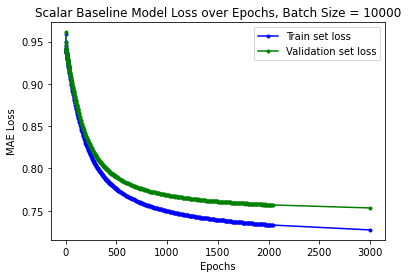

In [52]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Scalar Baseline Model Loss over Epochs, Batch Size = 10000')

## Smaller batch this time

In [53]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterOneScalarPerItem(
    n_epochs=3000, batch_size=100, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.41000 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     7.02000 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00417
epoch       0.001 | loss_total     9.63843 | train_MAE     2.82615 | valid_MAE     2.84067 | grad_wrt_mu     5.81060 | grad_wrt_b_per_user     0.00616 | grad_wrt_c_per_item     0.00345
epoch       0.003 | loss_total     6.49626 | train_MAE     2.27805 | valid_MAE     2.29101 | grad_wrt_mu     4.56607 | grad_wrt_b_per_user     0.00493 | grad_wrt_c_per_item     0.00276
epoch       0.004 | loss_total     4.19962 | train_MAE     1.87608 | valid_MAE     1.88653 | grad_wrt_mu     3.54967 | grad_wrt_b_per_user     0.00386 | grad_wrt_c_per_item     0.00218
epoch       0.126 | loss_total     1.19280 | train_MAE     0.94047 | valid_MAE     0.94235 | grad_wrt_mu     0.50725 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00108
epoch       0.250 | loss_total     1.06353 | train_MAE     0.91026 | valid_

epoch      22.000 | loss_total     0.85788 | train_MAE     0.73568 | valid_MAE     0.76061 | grad_wrt_mu     0.17530 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00087
epoch      23.000 | loss_total     0.85586 | train_MAE     0.73832 | valid_MAE     0.76388 | grad_wrt_mu     0.17886 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00084
epoch      24.000 | loss_total     0.85442 | train_MAE     0.73322 | valid_MAE     0.75851 | grad_wrt_mu     0.15939 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00085
epoch      25.000 | loss_total     0.85295 | train_MAE     0.73505 | valid_MAE     0.76097 | grad_wrt_mu     0.38471 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00077
epoch      26.000 | loss_total     0.85237 | train_MAE     0.73002 | valid_MAE     0.75549 | grad_wrt_mu     0.31883 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00084
epoch      27.000 | loss_total     0.85128 | train_MAE     0.72946 | valid_

epoch     102.000 | loss_total     0.83219 | train_MAE     0.71710 | valid_MAE     0.74660 | grad_wrt_mu     0.10913 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00077
epoch     104.000 | loss_total     0.83199 | train_MAE     0.71818 | valid_MAE     0.74827 | grad_wrt_mu     0.09459 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00074
epoch     106.000 | loss_total     0.83268 | train_MAE     0.72323 | valid_MAE     0.75437 | grad_wrt_mu     0.09765 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00077
epoch     108.000 | loss_total     0.83232 | train_MAE     0.72056 | valid_MAE     0.75131 | grad_wrt_mu     0.09334 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00084
epoch     110.000 | loss_total     0.83242 | train_MAE     0.71807 | valid_MAE     0.74820 | grad_wrt_mu     0.01431 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00083
epoch     112.000 | loss_total     0.83219 | train_MAE     0.71917 | valid_

epoch     256.000 | loss_total     0.82999 | train_MAE     0.71899 | valid_MAE     0.75134 | grad_wrt_mu     0.09068 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00087
epoch     260.000 | loss_total     0.82983 | train_MAE     0.71696 | valid_MAE     0.74882 | grad_wrt_mu     0.01775 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00090
epoch     264.000 | loss_total     0.82959 | train_MAE     0.72137 | valid_MAE     0.75406 | grad_wrt_mu     0.22435 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00076
epoch     268.000 | loss_total     0.82984 | train_MAE     0.71533 | valid_MAE     0.74642 | grad_wrt_mu     0.35312 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00091
epoch     272.000 | loss_total     0.82997 | train_MAE     0.72477 | valid_MAE     0.75803 | grad_wrt_mu     0.14527 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00081
epoch     276.000 | loss_total     0.82933 | train_MAE     0.71943 | valid_

epoch     436.000 | loss_total     0.82859 | train_MAE     0.71970 | valid_MAE     0.75304 | grad_wrt_mu     0.12834 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00076
epoch     440.000 | loss_total     0.82890 | train_MAE     0.71641 | valid_MAE     0.74922 | grad_wrt_mu     0.02962 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00073
epoch     444.000 | loss_total     0.82904 | train_MAE     0.71500 | valid_MAE     0.74710 | grad_wrt_mu     0.06520 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00072
epoch     448.000 | loss_total     0.82873 | train_MAE     0.72033 | valid_MAE     0.75380 | grad_wrt_mu     0.05939 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00073
epoch     452.000 | loss_total     0.82880 | train_MAE     0.71661 | valid_MAE     0.74938 | grad_wrt_mu     0.15616 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00080
epoch     456.000 | loss_total     0.82910 | train_MAE     0.71837 | valid_

epoch     720.000 | loss_total     0.82816 | train_MAE     0.71904 | valid_MAE     0.75306 | grad_wrt_mu     0.20712 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00067
epoch     728.000 | loss_total     0.82890 | train_MAE     0.71737 | valid_MAE     0.75113 | grad_wrt_mu     0.22657 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00090
epoch     736.000 | loss_total     0.82846 | train_MAE     0.71489 | valid_MAE     0.74785 | grad_wrt_mu     0.18193 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00076
epoch     744.000 | loss_total     0.82858 | train_MAE     0.71878 | valid_MAE     0.75276 | grad_wrt_mu     0.18331 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00072
epoch     752.000 | loss_total     0.82885 | train_MAE     0.71579 | valid_MAE     0.74914 | grad_wrt_mu     0.23315 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00082
epoch     760.000 | loss_total     0.82865 | train_MAE     0.71469 | valid_

epoch    1080.000 | loss_total     0.82871 | train_MAE     0.72040 | valid_MAE     0.75496 | grad_wrt_mu     0.37875 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00086
epoch    1088.000 | loss_total     0.82808 | train_MAE     0.71735 | valid_MAE     0.75138 | grad_wrt_mu     0.01768 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00075
epoch    1096.000 | loss_total     0.82821 | train_MAE     0.71724 | valid_MAE     0.75133 | grad_wrt_mu     0.09803 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00074
epoch    1104.000 | loss_total     0.82861 | train_MAE     0.71654 | valid_MAE     0.75049 | grad_wrt_mu     0.12563 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076
epoch    1112.000 | loss_total     0.82841 | train_MAE     0.71499 | valid_MAE     0.74858 | grad_wrt_mu     0.14767 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00081
epoch    1120.000 | loss_total     0.82840 | train_MAE     0.71694 | valid_

epoch    1440.000 | loss_total     0.82835 | train_MAE     0.71996 | valid_MAE     0.75467 | grad_wrt_mu     0.03241 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00074
epoch    1448.000 | loss_total     0.82796 | train_MAE     0.71452 | valid_MAE     0.74783 | grad_wrt_mu     0.04144 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00074
epoch    1456.000 | loss_total     0.82881 | train_MAE     0.71701 | valid_MAE     0.75125 | grad_wrt_mu     0.05477 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00079
epoch    1464.000 | loss_total     0.82836 | train_MAE     0.71823 | valid_MAE     0.75264 | grad_wrt_mu     0.41469 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00074
epoch    1472.000 | loss_total     0.82805 | train_MAE     0.71654 | valid_MAE     0.75063 | grad_wrt_mu     0.06396 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00079
epoch    1480.000 | loss_total     0.82881 | train_MAE     0.71637 | valid_

epoch    1800.000 | loss_total     0.82878 | train_MAE     0.71709 | valid_MAE     0.75138 | grad_wrt_mu     0.00985 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00079
epoch    1808.000 | loss_total     0.82907 | train_MAE     0.71437 | valid_MAE     0.74774 | grad_wrt_mu     0.19869 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00089
epoch    1816.000 | loss_total     0.82848 | train_MAE     0.71430 | valid_MAE     0.74759 | grad_wrt_mu     0.13317 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00077
epoch    1824.000 | loss_total     0.82826 | train_MAE     0.71787 | valid_MAE     0.75228 | grad_wrt_mu     0.35904 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00082
epoch    1832.000 | loss_total     0.82826 | train_MAE     0.71566 | valid_MAE     0.74961 | grad_wrt_mu     0.17424 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00086
epoch    1840.000 | loss_total     0.82886 | train_MAE     0.71828 | valid_

In [54]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 3.2339019614356417
Final Train MAE = 0.717527984857175
Final Valid MAE = 0.7519499667795829


In [55]:
test_y = test_tuple[2]
final_b_per_user = model.param_dict['b_per_user']
final_c_per_item = model.param_dict['c_per_item']
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu, b_per_user=final_b_per_user, c_per_item=final_c_per_item)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 0.7430818254346947


In [56]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)

In [57]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Scalar Baseline Model Loss over Epochs, Batch Size = 100')

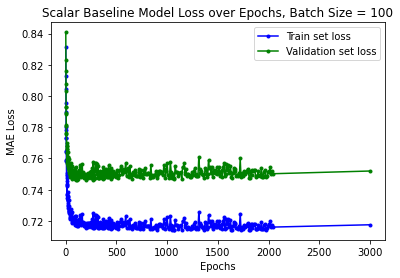

In [58]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Scalar Baseline Model Loss over Epochs, Batch Size = 100')

## short answer - item weight params

In [59]:
import os 
data_path='data_movie_lens_100k/'
select_movies_df = pd.read_csv(os.path.join(data_path, "select_movies.csv"))
select_movies_df

,item_id,title,release_year,orig_item_id
0,0,Toy Story (1995),1995,1
1,70,"Lion King, The (1994)",1994,71
2,98,Snow White and the Seven Dwarfs (1937),1937,99
3,131,"Wizard of Oz, The (1939)",1939,132
4,142,"Sound of Music, The (1965)",1965,143
5,49,Star Wars (1977),1977,50
6,171,"Empire Strikes Back, The (1980)",1980,172
7,180,Return of the Jedi (1983),1997,181
8,81,Jurassic Park (1993),1993,82
9,251,"Lost World: Jurassic Park, The (1997)",1997,252


In [60]:
movie_ids = select_movies_df['item_id'].values

In [61]:
scores = final_c_per_item[movie_ids]

In [62]:
movie_titles = select_movies_df['title'].values
movie_titles

array(['Toy Story (1995)', 'Lion King, The (1994)',
       'Snow White and the Seven Dwarfs (1937)',
       'Wizard of Oz, The (1939)', 'Sound of Music, The (1965)',
       'Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Return of the Jedi (1983)', 'Jurassic Park (1993)',
       'Lost World: Jurassic Park, The (1997)',
       'Raiders of the Lost Ark (1981)',
       'Indiana Jones and the Last Crusade (1989)',
       'While You Were Sleeping (1995)', 'Sleepless in Seattle (1993)',
       "My Best Friend's Wedding (1997)",
       'Nightmare Before Christmas, The (1993)', 'Shining, The (1980)',
       'Nightmare on Elm Street, A (1984)', 'Scream (1996)',
       'Scream 2 (1997)'], dtype=object)

In [63]:
# Printing out info for LaTex table
for ind in range(len(list(movie_titles))):
    print(movie_titles[ind][:-6] + ' & ' + str(round(scores[ind],3)) + r" \\")

Toy Story  & 0.604 \\
Lion King, The  & 0.496 \\
Snow White and the Seven Dwarfs  & 0.46 \\
Wizard of Oz, The  & 0.811 \\
Sound of Music, The  & 0.469 \\
Star Wars  & 1.101 \\
Empire Strikes Back, The  & 0.941 \\
Return of the Jedi  & 0.769 \\
Jurassic Park  & 0.42 \\
Lost World: Jurassic Park, The  & -0.364 \\
Raiders of the Lost Ark  & 1.072 \\
Indiana Jones and the Last Crusade  & 0.685 \\
While You Were Sleeping  & 0.268 \\
Sleepless in Seattle  & 0.256 \\
My Best Friend's Wedding  & 0.038 \\
Nightmare Before Christmas, The  & 0.356 \\
Shining, The  & 0.498 \\
Nightmare on Elm Street, A  & -0.002 \\
Scream  & 0.118 \\
Scream 2  & -0.236 \\
